![houses](images/houses.jpg)
<a href='https://www.freepik.com/vectors/sale'>Sale vector created by pch.vector - www.freepik.com</a>

## Business Understanding

In this project, we are exploring how home sale prices in King County are affected by the different features of the house, such as size, number of bedrooms and bathrooms, location, etc. We have been hired by ABC Realty to build a model that explains housing prices, to be used by ABC's clients looking to potentially sell their homes. Our goal is to determine if there are any improvements/renovations the seller can make to obtain a higher price, and what effect those improvements have on price.

## Data Understanding

### Loading and Investigating the Data

Import necessary libraries for cleaning and plotting data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

Load the raw dataset and explore the data.

In [2]:
df = pd.read_csv('data/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
# investigate top values for each column.

for col in df.columns:
    print(col)
    print(df[col].value_counts().head())
    print('\n')
        

id
795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
Name: id, dtype: int64


date
6/23/2014    142
6/26/2014    131
6/25/2014    131
7/8/2014     127
4/27/2015    126
Name: date, dtype: int64


price
350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
Name: price, dtype: int64


bedrooms
3    9824
4    6882
2    2760
5    1601
6     272
Name: bedrooms, dtype: int64


bathrooms
2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
Name: bathrooms, dtype: int64


sqft_living
1300    138
1400    135
1440    133
1660    129
1010    129
Name: sqft_living, dtype: int64


sqft_lot
5000    358
6000    290
4000    251
7200    220
7500    119
Name: sqft_lot, dtype: int64


floors
1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
Name: floors, dtype: int64


waterfront
0.0    19075
1.0      146
Name: waterfront, dtype: int64


view
0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Our dataset contains approximately 21,600 rows. There are some missing values that will need to be handled for 'waterfront', 'view', and 'yr_renovated'. In terms of datatypes, date will need to be converted to a date datatype and 'sqft_basement' will need to change to a float datatype.

Price is going to be our dependent variable. Let's look at the distribution of our variables.

### Check Distribution of Variables

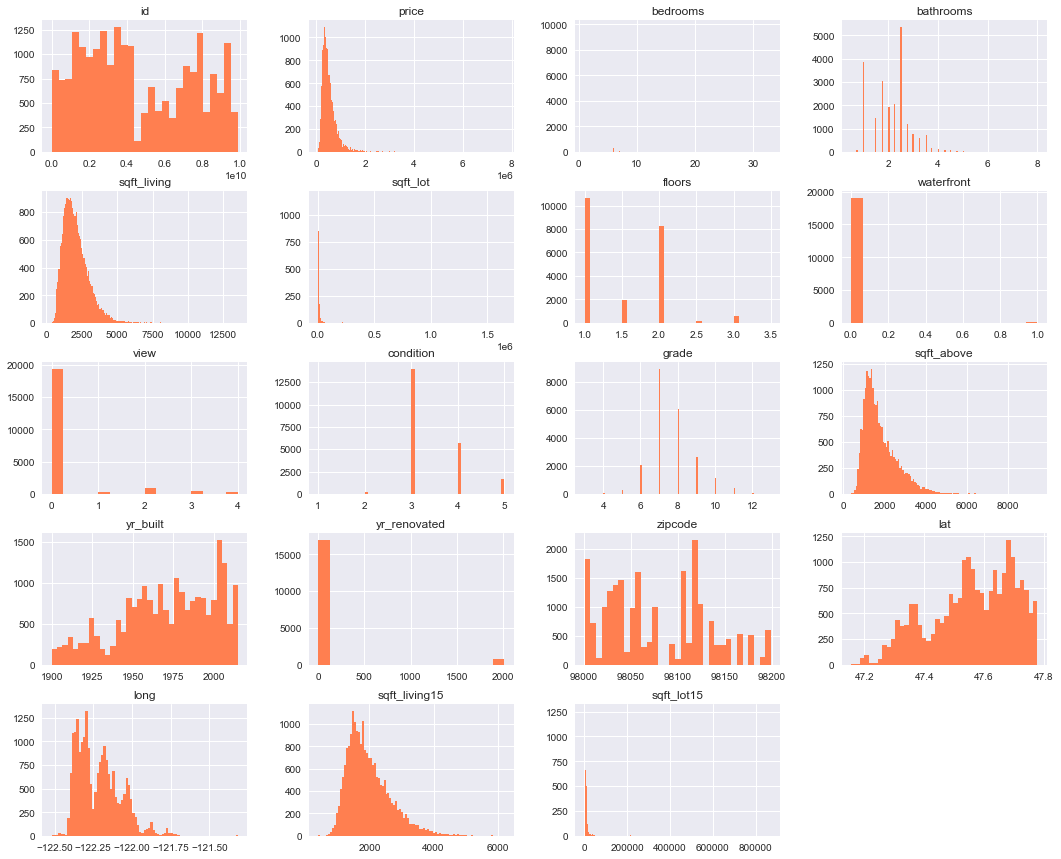

In [6]:
df.hist(figsize=(18,15), bins = 'auto', color='coral');

Some quick observations on our data:

* There are both continuous and categorical variables in our data set. We will need to handle these types of variables separately in order to create the most accurate model.
* There are some outliers in our dependent variable, price, which is skewing our data to the right.
* Bedrooms, sqft lot, and sqft lot 15 also appear to have outliers skewing the data right.
* We have access to location data through zipcode and also latitude and longitude.

### Visualize Location Data

Let's look at a scatter plot of the latitude and longitude data and also visualize how price varies by location.

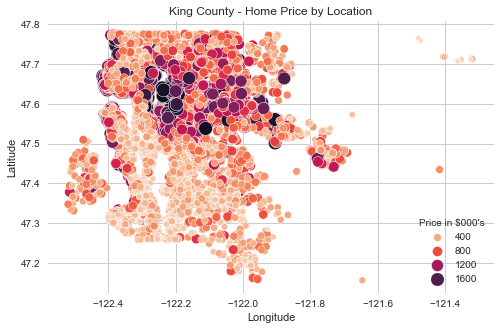

In [7]:
sns.set_style('whitegrid')
df_less_outliers = df[df['price']<2000000] #remove price outliers so can visualize range of prices better
price_in_thousands = (df_less_outliers.price/1000).rename("Price in $000's")
plt.figure(figsize=(8,5))
ax = sns.scatterplot(data=df, x="long", y="lat", hue=price_in_thousands, palette = "rocket_r", legend="brief", 
                size=price_in_thousands, sizes=(20, 200))
ax.set_title('King County - Home Price by Location')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude');
plt.savefig("images\price_location.png")

### Check Multicollinearity

Let's check if any of our features are correlated with each other, which could be problematic for our model.

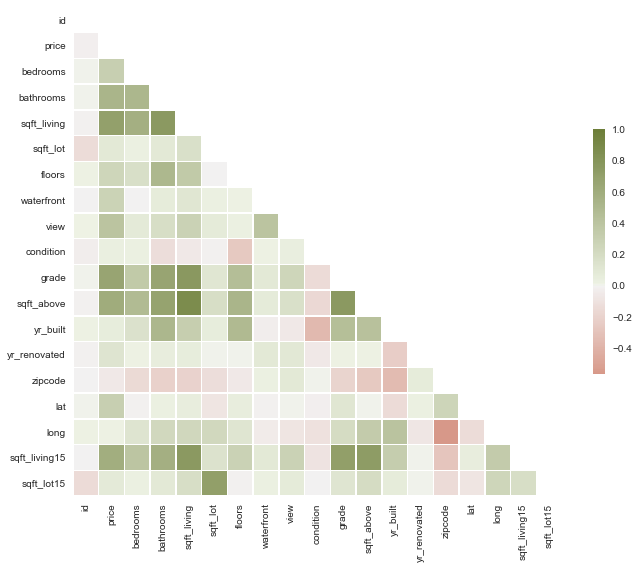

In [8]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(20, 100, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [9]:
# put correlation values into a dataframe for easier sorting

df_pairs=df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns in a new column named "pairs"
df_pairs['pairs'] = list(zip(df_pairs.level_0, df_pairs.level_1))

# set index to pairs
df_pairs.set_index(['pairs'], inplace = True)

# drop level columns
df_pairs.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc 
df_pairs.columns = ['cc']

# drop duplicates
df_pairs.drop_duplicates(inplace=True)

In [10]:
# return pairs with high correlation between .75 and 1

df_pairs[(df_pairs.cc>.75) & (df_pairs.cc <1)]

,cc
pairs,
"(sqft_living, sqft_above)",0.876448
"(grade, sqft_living)",0.762779
"(sqft_living, sqft_living15)",0.756402
"(sqft_above, grade)",0.756073
"(sqft_living, bathrooms)",0.755758


Based on this correlation table, it may make sense to drop sqft_living and sq_ft_above or grade, since these variables are highly correlated with other variables.

### Check Linearity

Lastly, let's check the linearity of each feature by viewing scatter plots.

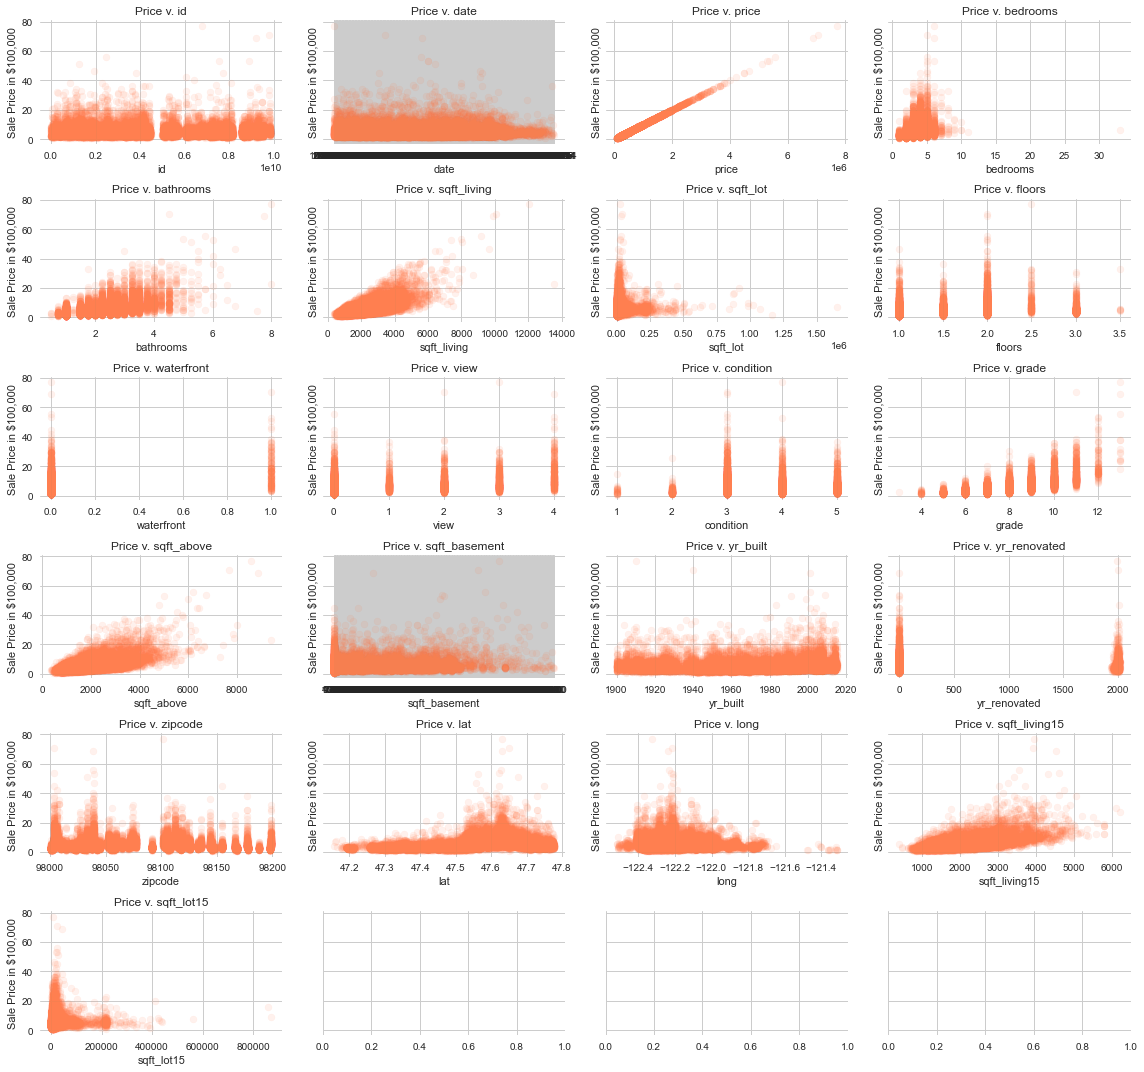

In [11]:
# Your code here 
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(), df.columns):
    ax.scatter(df[column], df['price'] / 100000, label=column, alpha=.1, color='coral')
    ax.set_title(f'Price v. {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Sale Price in $100,000')

fig.tight_layout()

Looking at these scatter plots, there looks to be a linear relationship with price and:
 * bathrooms
 * potentially bedrooms, but will need to take a closer look
 * sqft_living
 * grade
 * sqft_above
 * sqft_living15

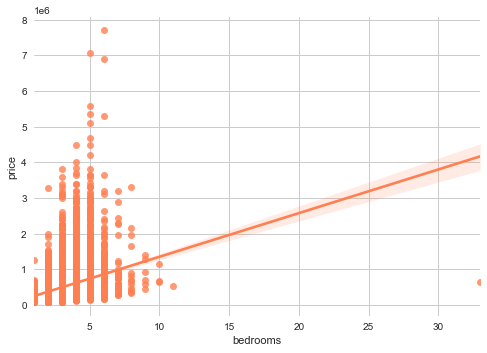

In [12]:
# Observe the relationship between bedrooms and price

sns.regplot(x="bedrooms", y="price", data=df, color="coral");

There is a single entry with a # of bedrooms above 30. This will need to be explored further. Generally, the relationship between price and bedrooms appears to be linear.

## Initial Data Preparation

In this section, we will perform basic data cleaning so that the dataset can be properly fed into a baseline model. Additional data cleaning to be performed in the [Housing Data Modeling](./Housing%20Data%20-%20Modeling.ipynb) notebook.

### Converting Datatypes

Let's inspect the sqft_basement values and see if this data type should be changed.

In [13]:
df.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
2400.0        1
276.0         1
666.0         1
2810.0        1
1548.0        1
Name: sqft_basement, Length: 304, dtype: int64

First, let's convert all '?' values to zero.

In [14]:
df.sqft_basement.replace('?',0.0, inplace=True)

In [15]:
df.sqft_basement.value_counts()

0.0       12826
0.0         454
600.0       217
500.0       209
700.0       208
          ...  
3480.0        1
1248.0        1
946.0         1
1525.0        1
1548.0        1
Name: sqft_basement, Length: 304, dtype: int64

Convert datatype to float.

In [16]:
df.sqft_basement = df.sqft_basement.map(lambda x: float(x))

In [17]:
# Confirm there are no longer 2 entries for 0.0
df.sqft_basement.value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [18]:
# check that sqft_basement is now a float object.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Next, let's convert the date column to a datetime format.

In [19]:
df['date'] = pd.to_datetime(df['date'])

In [20]:
# Confirm the datatype for date changed.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  float64       
 9   view           21534 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

### Handling Missing Values

Now, let's inspect and handle the missing values in our data.

In [21]:
# Confirm which columns have missing values.
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [22]:
# Check median and/or mean values for the columns with missing values.
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,285.716581,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,439.819830,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Looking at the waterfront, view and yr_renovated columns, the median values are 0 for all three columns. We think it is safe to assume these missing values can be filled in with the median values of 0.

In [23]:
for col in df.columns:
    try:
        median = df[col].median()
        df[col] = df[col].fillna(value=median)
    except:
        continue

#recheck missing values and confirm none left.        
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Removing Collinear Columns

Let's remove the collinear features we saw earlier during our multicollinearity check. It looks like sqft_living is correlated with sqft_above, grade, and bathrooms, so let's drop that feature. We are also going to drop grade, as it is also correlated with sqft_above.

In [24]:
df_pairs[(df_pairs.cc>.75) & (df_pairs.cc <1)]

,cc
pairs,
"(sqft_living, sqft_above)",0.876448
"(grade, sqft_living)",0.762779
"(sqft_living, sqft_living15)",0.756402
"(sqft_above, grade)",0.756073
"(sqft_living, bathrooms)",0.755758


In [25]:
df.drop(['sqft_living', 'grade'], inplace=True, axis=1)

### Further Inspect Bedrooms

We noticed before there was one large outlier entry of a home with more than 30 bedrooms. Let's handle that outlier now.

<AxesSubplot:>

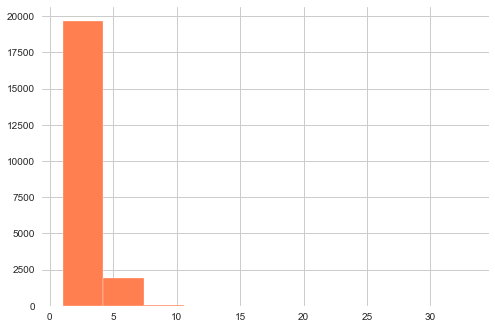

In [26]:
df.bedrooms.hist(color='coral')

In [27]:
df.bedrooms.describe()

count    21597.000000
mean         3.373200
std          0.926299
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

Let's look at the home with the maximum value of 33 bedrooms that is skewing our data set.

In [28]:
df.loc[df['bedrooms']==33]

,id,date,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,2014-06-25,640000.0,33,1.75,6000,1.0,0.0,0.0,5,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


It doesn't make sense that a house with 1,040 square feet would contain 33 bedrooms. We are going to assume this was an incorrect data entry and drop the row from our data set.

In [29]:
df.drop(df[df['bedrooms']==33].index, inplace=True)

<AxesSubplot:>

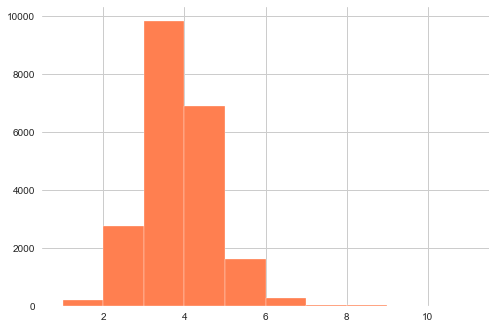

In [30]:
df.bedrooms.hist(color='coral')

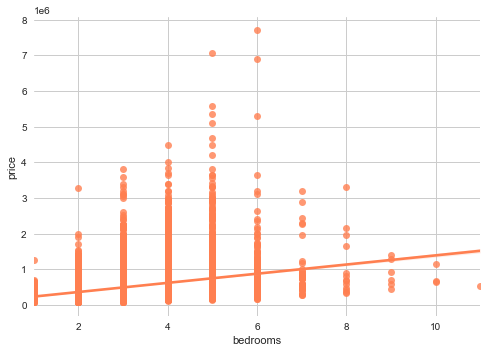

In [31]:
sns.regplot(x="bedrooms", y="price", data=df, color="coral");

Our bedroom distribution appears much more normal, which although isn't necessary, should improve the overall results of our model. The relationship between price and bedrooms also appears to generally be linear.

### Export Clean Data

In [32]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,5650,1.0,0.0,0.0,3,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,7242,2.0,0.0,0.0,3,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,10000,1.0,0.0,0.0,3,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,5000,1.0,0.0,0.0,5,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,8080,1.0,0.0,0.0,3,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [33]:
df.to_csv("data/housing_data_clean.csv", index=False)

In the next [notebook](./Housing%20Data%20-%20Modeling.ipynb), we will run a baseline linear regression model and further manipulate the data into creating a more accurate model.